## Sammenlign selvsamlede data med data fra seklima.no

I denne oppgaven skal vi

1) laste ned et datasett fra [seklima](seklima.met.no)

2) inspisere datasettet

3) lese datasettet inn i Python med pandas

4) konvertere til numpy

5) lage en figur

6) lese inn test-datasettet til Ragnhild

7) lage en figur med både data fra seklima.no og temperaturmålingene.

#### 1) Last ned datasettet

For det datasettet jeg har brukt i denne oppgaven har jeg valgt:
- start: 4 Jan 22
- slutt: 6 Jan 22
- timesoppløsning
- lufttemperatur
- Bergen - Florida

Når man har valgt de variablene (du kan velge flere samtidig) og den tidsperioden/stedet du vil ha:
- vis resulatat - sjekk at det er rett periode
- Last ned csv.

- kopier table.csv til en fornuftig mappe slik at du finner den igjen
- lag nytt og forståelig navn til filen.

#### 2) Inspiser datasettet
Åpne filen i notepad (eller lignende) for å sjekke informasjonen og format, er det header (en linje øverst med besrkivende tekst), etc.

#### 3) Last inn datasettet 
Vi bruker pakken/biblioteket `Pandas` for dette. Dette er et bibliotek på linje med `Numpy` som vi er godt vandt med. `Pandas` har en veldig grei funksjon for å laste inn csv-filer. 

- sep=';' beskriver hva som deler kolonnene i filen. Hvis du åpner filen i f.eks. notepad ser du at dette er semikolon i vårt tilfelle, men det er ofte tab, komma (default), eller kolon.
- decimal=',' må være med fordi verdiene i denne csv-filen er lagret med komma som desimaltegn istedet for punktum. For at verdien skal tolkes som ett tall og ikke to må komma endres til punktum.
- parse_dates=['Tid(norsk normaltid)'] konverterer innholdet i denne kolonnen til dato-format.
- dayfirst=True sørger for at datoen tolkes riktig. Uten denne tolkes det første tallet i datoen som måned.

Det finnes mange slike spesifiseringer som dette (se dokumentasjonen til funskjonen pd.read_csv [her](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)). De spesifiseringene vi bruker i denne oppgaven fungere i vårt tilfelle, men det betyr ikke at det vil fungere i alle andre tilfeller. Helt sist i oppgaven laster vi inn et temperaturdatasett som Ragnhild har samlet inn, og der er spesifiseringene litt annerledes. Men oppsettet er likt. 



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
sti='O:/Work/Documents/EkteData/MyProg'
fil='/timesnedbør_Bergen_Januar.csv'

In [10]:
df = pd.read_csv(
    sti+fil, 
    sep=';',
    decimal=',',
    parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True
)

In [11]:
df

,Navn,Stasjon,Tid(norsk normaltid),Lufttemperatur
0,Bergen - Florida,SN50540,2022-01-04 01:00:00,2.5
1,Bergen - Florida,SN50540,2022-01-04 02:00:00,2.9
2,Bergen - Florida,SN50540,2022-01-04 03:00:00,3.6
3,Bergen - Florida,SN50540,2022-01-04 04:00:00,3.2
4,Bergen - Florida,SN50540,2022-01-04 05:00:00,3.3
...,...,...,...,...
68,Bergen - Florida,SN50540,2022-01-06 21:00:00,3.1
69,Bergen - Florida,SN50540,2022-01-06 22:00:00,3.5
70,Bergen - Florida,SN50540,2022-01-06 23:00:00,3.1
71,Bergen - Florida,SN50540,2022-01-07 00:00:00,2.4


Man får ut en fin tabell. Informasjonen som lå i headeren har kommet som titler på kolonnene, og man ser indeksen til hver rad helt til venstre. 

For å få tak i en av kolonnene skriver man som dette: 

In [12]:
df['Lufttemperatur']

0     2.5
1     2.9
2     3.6
3     3.2
4     3.3
     ... 
68    3.1
69    3.5
70    3.1
71    2.4
72    NaN
Name: Lufttemperatur, Length: 73, dtype: float64

In [13]:
df['Tid(norsk normaltid)']

0    2022-01-04 01:00:00
1    2022-01-04 02:00:00
2    2022-01-04 03:00:00
3    2022-01-04 04:00:00
4    2022-01-04 05:00:00
             ...        
68   2022-01-06 21:00:00
69   2022-01-06 22:00:00
70   2022-01-06 23:00:00
71   2022-01-07 00:00:00
72                   NaT
Name: Tid(norsk normaltid), Length: 73, dtype: datetime64[ns]

Vi lagrer kolonnen med tid som `tid_Florida` og kolonnen med temperatur som `temp_Florida`. Vi utelukker det siste elementet i begge radene fordi dette bare er NaN.

In [14]:
tid_Florida=df['Tid(norsk normaltid)'][:-1]
temp_Florida=df['Lufttemperatur'][:-1]

In [15]:
tid_Florida

0    2022-01-04 01:00:00
1    2022-01-04 02:00:00
2    2022-01-04 03:00:00
3    2022-01-04 04:00:00
4    2022-01-04 05:00:00
             ...        
67   2022-01-06 20:00:00
68   2022-01-06 21:00:00
69   2022-01-06 22:00:00
70   2022-01-06 23:00:00
71   2022-01-07 00:00:00
Name: Tid(norsk normaltid), Length: 72, dtype: datetime64[ns]

#### 4) Konverter til Numpy
Plottebiblioteket vi bruker, `Matplotlib` er flinkere til å behandle data på `Numpy`-format enn `Pandas`-format. Dersom f.eks. tiden mellom måletidspunkt ikke er konstant vil `Pandas` likevel plotte dette med jevne intervall, mens `Numpy` tar stilling til selve tidverdien og plotter datapunktene med så stor avstand de skal ha. Derfor konverterer vi variablene våre fra `pandas` til `Numpy` arrays. 

In [16]:
tid_Florida=tid_Florida.to_numpy()
tid_Florida

array(['2022-01-04T01:00:00.000000000', '2022-01-04T02:00:00.000000000',
       '2022-01-04T03:00:00.000000000', '2022-01-04T04:00:00.000000000',
       '2022-01-04T05:00:00.000000000', '2022-01-04T06:00:00.000000000',
       '2022-01-04T07:00:00.000000000', '2022-01-04T08:00:00.000000000',
       '2022-01-04T09:00:00.000000000', '2022-01-04T10:00:00.000000000',
       '2022-01-04T11:00:00.000000000', '2022-01-04T12:00:00.000000000',
       '2022-01-04T13:00:00.000000000', '2022-01-04T14:00:00.000000000',
       '2022-01-04T15:00:00.000000000', '2022-01-04T16:00:00.000000000',
       '2022-01-04T17:00:00.000000000', '2022-01-04T18:00:00.000000000',
       '2022-01-04T19:00:00.000000000', '2022-01-04T20:00:00.000000000',
       '2022-01-04T21:00:00.000000000', '2022-01-04T22:00:00.000000000',
       '2022-01-04T23:00:00.000000000', '2022-01-05T00:00:00.000000000',
       '2022-01-05T01:00:00.000000000', '2022-01-05T02:00:00.000000000',
       '2022-01-05T03:00:00.000000000', '2022-01-05

In [17]:
temp_Florida=temp_Florida.to_numpy()

In [18]:
temp_Florida

array([ 2.5,  2.9,  3.6,  3.2,  3.3,  3.8,  2.9,  3.4,  2.9,  1.5,  2.7,
        3.5,  4.7,  3.6,  3.8,  2.8,  3.7,  3.6,  2.7,  2.4,  2.4,  2.5,
        2.1,  2.2,  2.3,  2. ,  2.3,  1.8,  2.1,  2.3,  2.4,  2.2,  2.5,
        2.3,  2.6,  2.3,  3. ,  2.9,  2.6,  2.5,  2.4,  2.5,  0.9,  0.1,
        1.4,  1. ,  0.7,  0.3, -1.1, -1.3, -1.6, -1.9, -2.4, -2.3, -2.3,
       -2.5, -2.1, -2.2, -0.8,  0.7,  0.9,  1. ,  1.4,  1.5,  1.7,  2.4,
        2.6,  3. ,  3.1,  3.5,  3.1,  2.4])

#### 5) Lag en figur

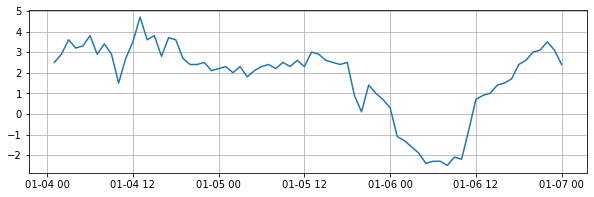

In [14]:
plt.figure(figsize=(10,3))
plt.plot(tid_Florida, temp_Florida)
plt.grid()
plt.show()

#### 6) Sammenlign observasjonene ved Florida med observasjonene til Ragnhild

In [21]:
sti='O:/Work/Documents/EkteData/EkteData/data'
fil='/4-6_januar_Temperaturegistrering_AB-vei.csv'

Datasettet til Ragnhild er satt opp litt annerledes enn datasettene til seklima.no. Men begge datsettene er på csv-format, så vi bruker fremdeles funksjonen pd.read_csv(). Spesifiseringene vi tregner nå er:
- sep=',': kolonnene i csv-filen er skilt med komma. Dette er default for csv-filer, så denne spesifiseringen er strengt tatt overflødig.
- engine=python: siden Celcius en angitt med grad-tegn (special character) må man spesifisere engine.
- parse:dates=['Time']: konverterer kolonnen med tid til "Timestamp" som er lett å jobbe med for tid.

Og som jeg nevnte i timen, dette er ikke spesifiseringer man husker i hodet. Man bruker dokumentasjonen, ser på hva man får ut eller feilmeldingen, og justerer til man får ut en tabell som inneholder all informasjonen i datafilen du leser inn. Som en tommelfingerregel trenger man nesten alltid `sep=''` og `parse_dates=['']`.

In [22]:
df=pd.read_csv(
    sti+fil, 
    sep=',', 
    engine='python',
    parse_dates=['Time']
)

In [23]:
df

,Temp AB-vei,Time,Celsius(°C),Comments,Serial Number
0,1,2022-01-04 15:00:00,4.0,NaN,60039020.0
1,2,2022-01-04 15:01:00,4.0,NaN,NaN
2,3,2022-01-04 15:02:00,4.0,NaN,NaN
3,4,2022-01-04 15:03:00,4.0,NaN,NaN
4,5,2022-01-04 15:04:00,4.0,NaN,NaN
...,...,...,...,...,...
2569,2570,2022-01-06 09:49:00,9.5,NaN,NaN
2570,2571,2022-01-06 09:50:00,10.5,NaN,NaN
2571,2572,2022-01-06 09:51:00,11.0,NaN,NaN
2572,2573,2022-01-06 09:52:00,12.0,NaN,NaN


In [25]:
# Lagre kolonnene med tid og temp som nye variabler
tid=df['Time']
temp=df['Celsius(°C)']

In [26]:
# Konverter tid og temp til numpy-arrays
temp=temp.to_numpy()
tid=tid.to_numpy()

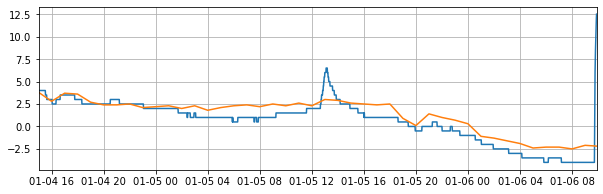

In [27]:
# Lag en figur med både dataene fra seklima og de Ragnhild har samler inn
plt.figure(figsize=(10,3))
plt.plot(tid,temp) # Ragnhild sine observasjoner
plt.plot(tid_Florida,temp_Florida) # seklima sine data
plt.grid()
plt.xlim(tid[0], tid[-1]) # Begrens xaksen til tidsperioden Ragnhild observerte
plt.show()

--------------
#### Et lite notat:
Man kan også konvertere hele dataframen (df) til numpy på en gang istedet for å plukke ut de kolonnene vi trenger og så konvertere disse (slik som vi gjorde over). Hvis man konvertere hele dataframen til numpy med en gang kan man indeksere kolonnene som vanlig:

In [28]:
data=df.to_numpy()

In [29]:
data

array([[1, Timestamp('2022-01-04 15:00:00'), 4.0, nan, 60039020.0],
       [2, Timestamp('2022-01-04 15:01:00'), 4.0, nan, nan],
       [3, Timestamp('2022-01-04 15:02:00'), 4.0, nan, nan],
       ...,
       [2572, Timestamp('2022-01-06 09:51:00'), 11.0, nan, nan],
       [2573, Timestamp('2022-01-06 09:52:00'), 12.0, nan, nan],
       [2574, Timestamp('2022-01-06 09:53:00'), 12.5, nan, nan]],
      dtype=object)

In [30]:
# Vanlig indekseing: ":" for alle radene, og "1" for kolonne med indeks 1
tid=data[:,1] 

In [31]:
tid

array([Timestamp('2022-01-04 15:00:00'), Timestamp('2022-01-04 15:01:00'),
       Timestamp('2022-01-04 15:02:00'), ...,
       Timestamp('2022-01-06 09:51:00'), Timestamp('2022-01-06 09:52:00'),
       Timestamp('2022-01-06 09:53:00')], dtype=object)

In [32]:
temp=data[:,2]

In [33]:
temp

array([4.0, 4.0, 4.0, ..., 11.0, 12.0, 12.5], dtype=object)

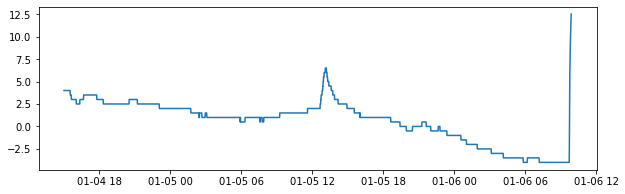

In [35]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.show()